In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys  
sys.path.insert(0, '../scripts')

from D_plot_specificity_matrix_utils import (peptide_per_clonotype_by_gem_size, calc_binding_concordance,epitope_sorter_index)

In [3]:
MARKER_GENES = marker_genes = np.array(['RAKFKQLL B0801', 'VTEHDTLLY A0101', 'TPRVTGGGAM B0702','NLVPMVATV A0201'])#scprep.select.get_gene_set(data, exact_word=data.columns[:91].to_list())

# Input

In [4]:
DF = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv"

In [5]:
DATA = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_CAT_IONTORRENT_KMA_AKB/clustering/data.KMeans.10.csv"
META = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_CAT_IONTORRENT_KMA_AKB/clustering/meta.KMeans.10.csv"
TOPG = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_CAT_IONTORRENT_KMA_AKB/clustering/top_genes.KMeans.10.%i.csv"

In [15]:
M_EXTRA = 'meta.csv'

# Load

In [6]:
data = pd.read_csv(DATA, index_col=0)

In [7]:
meta = pd.read_csv(META, index_col=0)

In [8]:
df = pd.read_csv(DF)

In [9]:
total = calc_binding_concordance(df[(df.umi_count_mhc >= 17) &
                                    (df.delta_umi_mhc >= 2) &
                                    (df.delta_umi_TRB >= 2)].copy(), 'ct')

In [16]:
m_extra = pd.read_csv(M_EXTRA, index_col=0)

In [23]:
meta['num_clonotype'] = meta.index.map(m_extra.num_clonotype)
meta['num_clonotype_cred'] = meta.index.map(m_extra.num_clonotype_cred)

## Load Top Genes

In [10]:
topg_df = pd.DataFrame(index=np.arange(8), columns=np.arange(10))
for i in range(10):
    topg = pd.read_csv(TOPG %i, index_col=0)
    topg_df[i] = topg.head(8).index

<BarContainer object of 20 artists>

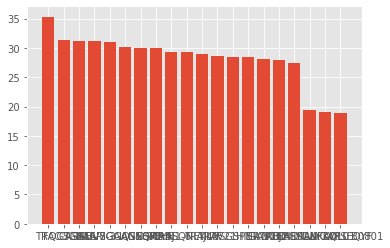

In [11]:
plt.bar(topg.head(20).index, topg.head(20).ttest)

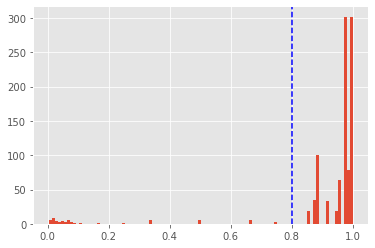

In [12]:
plt.hist(total.binding_concordance, bins=100)
plt.axvline(0.8, c='b', linestyle='--')

In [25]:
meta.groupby('KMeans').num_clonotype.unique()

KMeans
0                                [0.0, 18.0, 6.0, 7.0]
1    [26.0, 4.0, 5.0, 0.0, 420.0, 57.0, 6.0, 18.0, ...
2              [2.0, 8.0, 0.0, 83.0, 25.0, 30.0, 16.0]
3    [0.0, 6.0, 4.0, 5.0, 51.0, 339.0, 310.0, 11.0,...
4    [2.0, 0.0, 16.0, 8.0, 30.0, 25.0, 101.0, 35.0,...
5    [1.0, 28.0, 14.0, 392.0, 95.0, 29.0, 27.0, 22....
6    [4.0, 7.0, 6.0, 5.0, 62.0, 57.0, 11.0, 0.0, 30...
7            [nan, 2.0, 96.0, 298.0, 0.0, 52.0, 347.0]
8             [1.0, nan, 0.0, 73.0, 225.0, 17.0, 16.0]
9    [nan, 4.0, 256.0, 2.0, 11.0, 274.0, 8.0, 3.0, ...
Name: num_clonotype, dtype: object

In [14]:
total[total.binding_concordance < 0.8].sort_values(by=['ct','peptide_HLA'])

,gem,clonotype,num_clonotype,ct,genes_TRA,genes_TRB,genes_lst_TRA,genes_lst_TRB,length_TRA,cdr3_TRA,...,likely_HLA_mhc,peptide,peptide_lst,peptide_HLA,peptide_HLA_lst,epitope,epitope_lst,gems_per_specificity,gems_per_clonotype,binding_concordance
827,CGATGTAGTACTCAAC-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],514.0,CAASQNEKLTF,...,NaN,EERQAYLTNQY,['EERQAYLTNQY'],EERQAYLTNQY A0101,['EERQAYLTNQY A0101'],45_1_3,['45_1_3'],1,87,0.011494
929,CGTCTACAGCAGCCTC-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],517.0,CAASQNEKLTF,...,NaN,NLVPMVATV,['ALPGVPPV' 'NLVPMVATV'],NLVPMVATV A0201,['ALPGVPPV A0201' 'NLVPMVATV A0201'],V13_A2 CMV pp65 NLV,['06_1_1' 'V13_A2 CMV pp65 NLV'],1,87,0.011494
781,CCTTTCTGTCCTGCTT-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],537.0,CAASQNEKLTF,...,NaN,RAKFKQLL,['TPRVTGGGAM' 'RAKFKQLL'],RAKFKQLL B0801,['TPRVTGGGAM B0702' 'RAKFKQLL B0801'],V17_B8 EBV BZLF1 (C9),['V14_B7 CMV pp65 TPR' 'V17_B8 EBV BZLF1 (C...,2,87,0.022989
1250,GATGAAAGTAAAGGAG-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],475.0,CAASQNEKLTF,...,NaN,RAKFKQLL,['TPRVTGGGAM' 'AMLIRDRL' 'VTEHDTLLY' 'RAKFKQLL'],RAKFKQLL B0801,['TPRVTGGGAM B0702' 'AMLIRDRL B0801' 'VTEHDTLL...,V17_B8 EBV BZLF1 (C9),['V14_B7 CMV pp65 TPR' '47_1_78' 'V15_A1 C...,2,87,0.022989
350,AGTAGTCAGAGCTTCT-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],510.0,CAASQNEKLTF,...,NaN,VTEHDTLLY,['RAKFKQLL' 'ATTADVDAGSL' 'FSAGAFILYN' 'VTEHDT...,VTEHDTLLY A0101,['RAKFKQLL B0801' 'ATTADVDAGSL A0101' 'FSAGAFI...,V15_A1 CMV pp50 VTE,['V17_B8 EBV BZLF1 (C9)' '45_1_1' '45_1_5' 'V1...,6,87,0.068966
512,CACACCTAGGAATTAC-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],477.0,CAASQNEKLTF,...,NaN,VTEHDTLLY,['TNQYMQRMASV' 'ATTADVDAGSL' 'VTEHDTLLY'],VTEHDTLLY A0101,['TNQYMQRMASV A2401' 'ATTADVDAGSL A0101' 'VTEH...,V15_A1 CMV pp50 VTE,['45_1_61' '45_1_1' 'V15_A1 CMV pp50 VTE'],6,87,0.068966
640,CATGACAAGGGAAACA-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],497.0,CAASQNEKLTF,...,NaN,VTEHDTLLY,['TNQYMQRMASV' 'FSAGAFILYN' 'SVDIHFDPG' 'TPRVT...,VTEHDTLLY A0101,['TNQYMQRMASV A2401' 'FSAGAFILYN A0101' 'SVDIH...,V15_A1 CMV pp50 VTE,['45_1_61' '45_1_5' '45_1_13' 'V14_B7 CMV pp...,6,87,0.068966
800,CGACTTCGTCAGAAGC-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],511.0,CAASQNEKLTF,...,NaN,VTEHDTLLY,['SVDIHFDPG' 'ATTADVDAGSL' 'FSAGAFILYN' 'RAKFK...,VTEHDTLLY A0101,['SVDIHFDPG A0101' 'ATTADVDAGSL A0101' 'FSAGAF...,V15_A1 CMV pp50 VTE,['45_1_13' '45_1_1' '45_1_5' 'V17_B8 EBV BZLF1...,6,87,0.068966
1174,GACAGAGAGTCCAGGA-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],541.0,CAASQNEKLTF,...,NaN,VTEHDTLLY,['SVDIHFDPG' 'ATTADVDAGSL' 'VTEHDTLLY'],VTEHDTLLY A0101,['SVDIHFDPG A0101' 'ATTADVDAGSL A0101' 'VTEHDT...,V15_A1 CMV pp50 VTE,['45_1_13' '45_1_1' 'V15_A1 CMV pp50 VTE'],6,87,0.068966
1391,GGAATAACAATGGACG-1,clonotype1,1.0,1.0,TRAV21;TRAJ48;TRAC,TRBV27;;TRBJ1-6;TRBC1,['TRAV21;TRAJ48;TRAC'],['TRBV27;;TRBJ1-6;TRBC1'],531.0,CAASQNEKLTF,...,NaN,VTEHDTLLY,['ATTADVDAGSL' 'VTEHDTLLY'],VTEHDTLLY A0101,['ATTADVDAGSL A0101' 'VTEHDTLLY A0101'],V15_A1 CMV pp50 VTE,['45_1_1' 'V15_A1 CMV pp50 VTE'],6,87,0.068966


In [15]:
relevant_clonotypes = total[total.binding_concordance < 0.8].ct.unique()

In [16]:
colors_cluster = sns.color_palette('cubehelix',meta.KMeans.max()+1)
col2cluster = dict(zip(list(range(meta.KMeans.max()+1)), colors_cluster))
colors_cluster

[(0.09854228363950114, 0.07115215572295082, 0.16957891809124037),
 (0.09159726558869188, 0.20394337960213008, 0.29623965888210324),
 (0.09406611799930162, 0.3578871412608098, 0.2837709711722866),
 (0.23627685553553793, 0.46114369021199075, 0.19770731888985724),
 (0.49498740849493095, 0.4799034869159042, 0.21147789468974837),
 (0.7354526513473981, 0.4748861903571046, 0.40254094042448907),
 (0.8325928529853291, 0.5253446757844744, 0.6869376931865354),
 (0.7936920632275369, 0.6641337211433709, 0.9042311843062529),
 (0.7588424692372241, 0.8253990353420474, 0.9542699331220588),
 (0.8385645211683802, 0.9411869386771845, 0.9357655639413166)]

In [17]:
colors_pep_HLA = sns.color_palette('Spectral', len(MARKER_GENES))
col2pep_HLA = dict(zip(MARKER_GENES, colors_pep_HLA))
colors_pep_HLA

[(0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9019607843137256, 0.9607843137254902, 0.5960784313725491),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

In [18]:
colors_stair = sns.color_palette('magma', 4)
col2stair = dict(zip([1,2,3,4], colors_stair))
col2stair_labels = dict(zip(['GEMs of alt. peptide',
                             'Max conc. GEMs of ct',
                             'Low conc. GEMs (query)',
                             'GEMs of query peptide'],
                            col2stair.values()))
colors_stair

[(0.232077, 0.059889, 0.437695),
 (0.550287, 0.161158, 0.505719),
 (0.868793, 0.287728, 0.409303),
 (0.994738, 0.62435, 0.427397)]

In [19]:
column_label = list()
for i, name in enumerate(data.columns):
    if ' ' in name:
        column_label.append('peptide')
    elif 'TRA' in name:
        column_label.append('TRA')
    elif 'TRB' in name:
        column_label.append('TRB')
    else:
        column_label.append('CDR3')

In [20]:
colors_label = sns.color_palette("Set2", len(np.unique(column_label))) #"husl
col2col = dict(zip(np.unique(column_label), colors_label))
colors_label

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)]

In [21]:
column_color = pd.DataFrame(column_label, index=data.columns, columns=['source']).source.map(col2col)

In [22]:
import matplotlib.patches as mpatches
import seaborn as sns
legend_TN = [mpatches.Patch(color=c, label=l) for l,c in col2pep_HLA.items()]
legend_TN += [mpatches.Patch(color=c, label=l) for l,c in col2cluster.items()]
legend_TN += [mpatches.Patch(color=c, label=l) for l,c in col2stair_labels.items()]

39.0
NLVPMVATV A0201


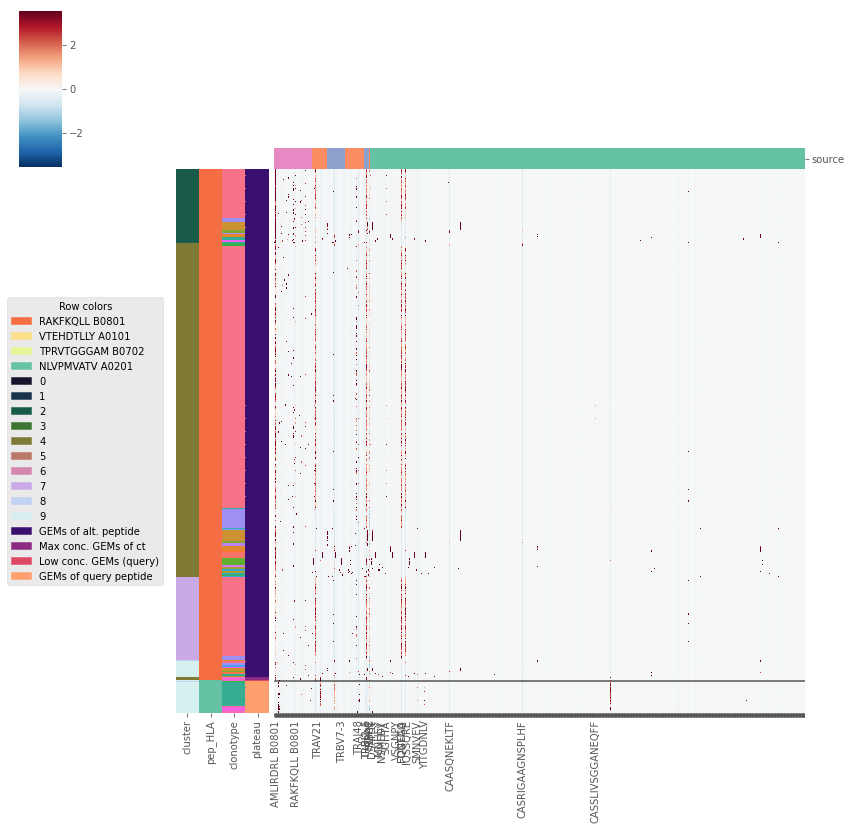

157.0
FSAGAFILYK A0101


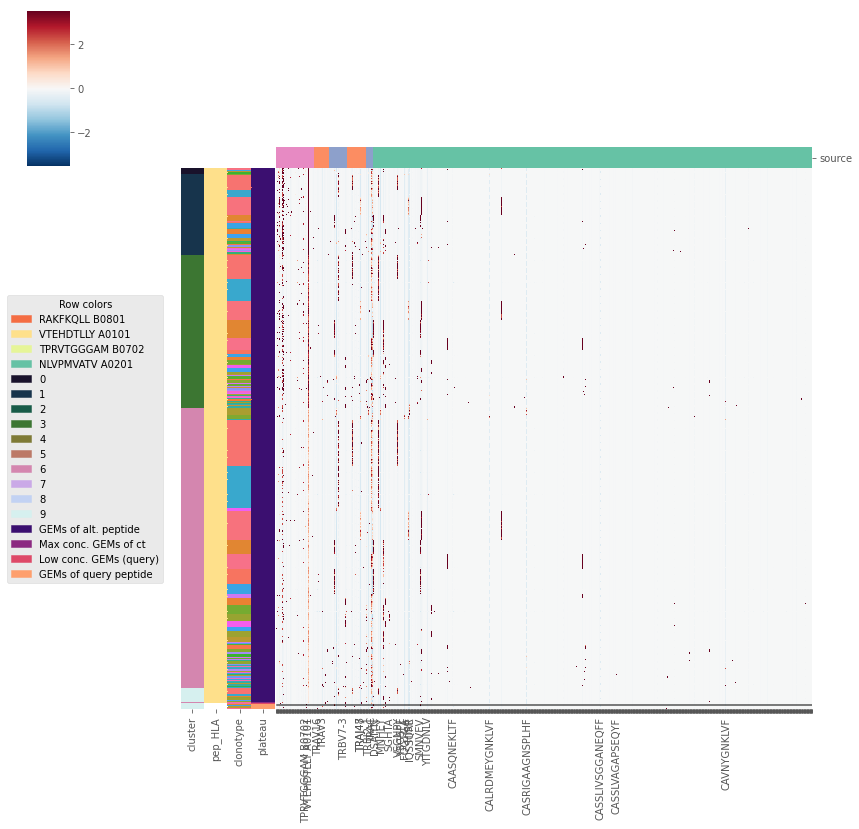

1.0
VTEHDTLLY A0101


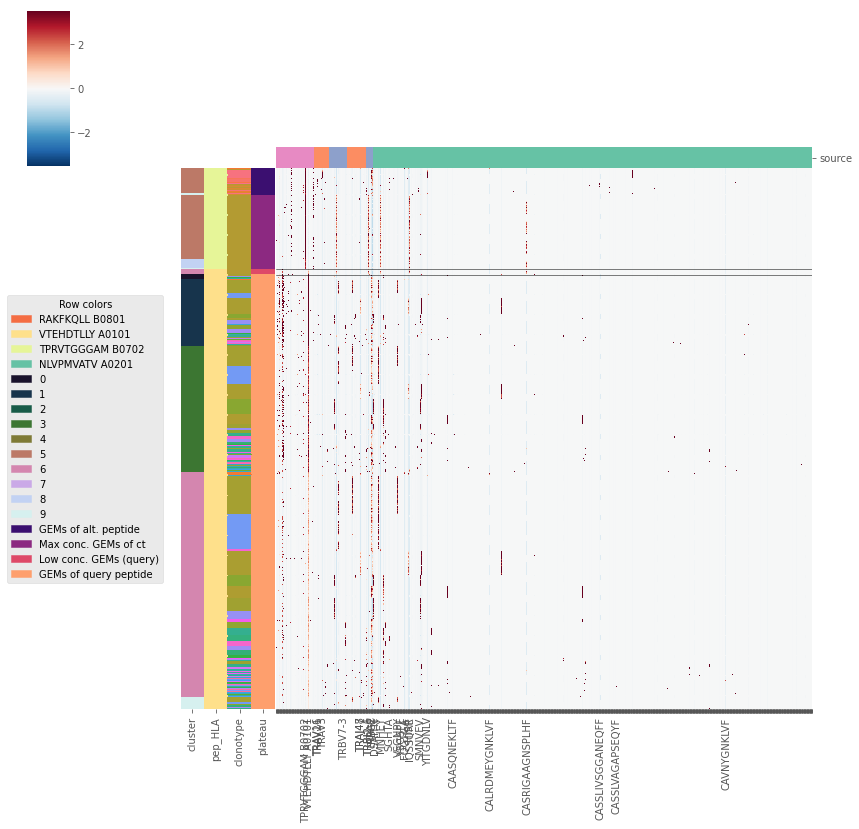

RAKFKQLL B0801


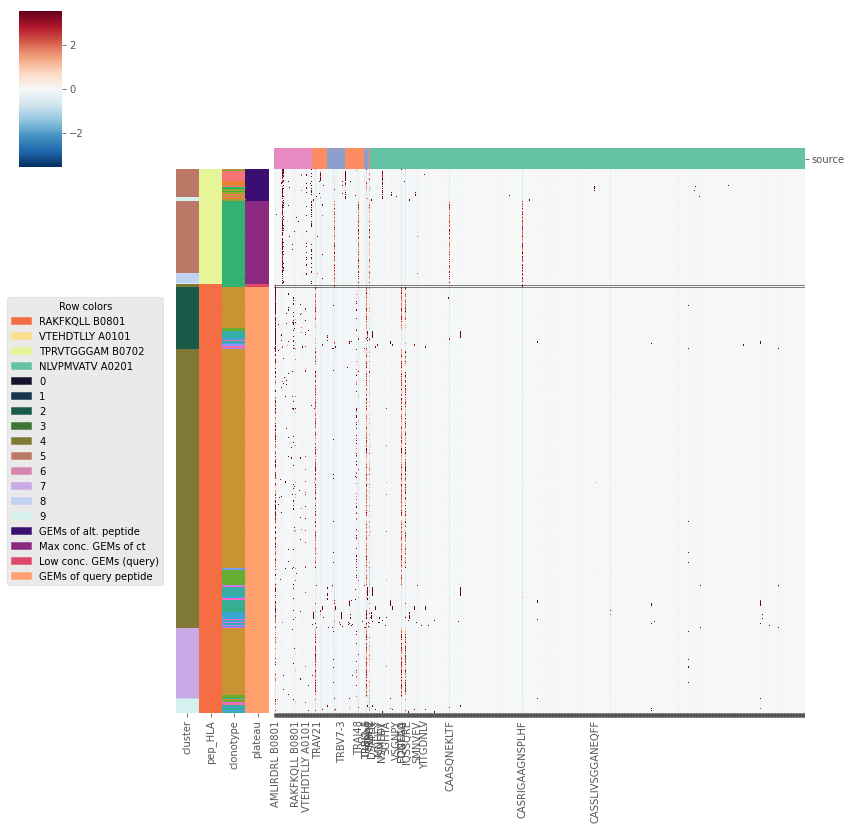

EERQAYLTNQY A0101


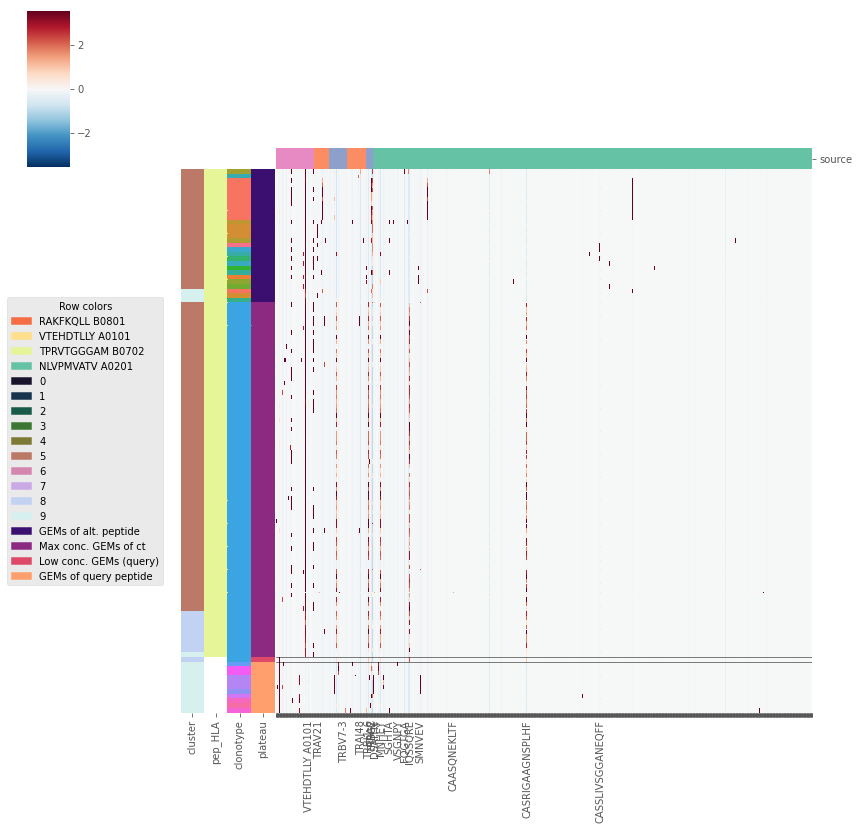

NLVPMVATV A0201


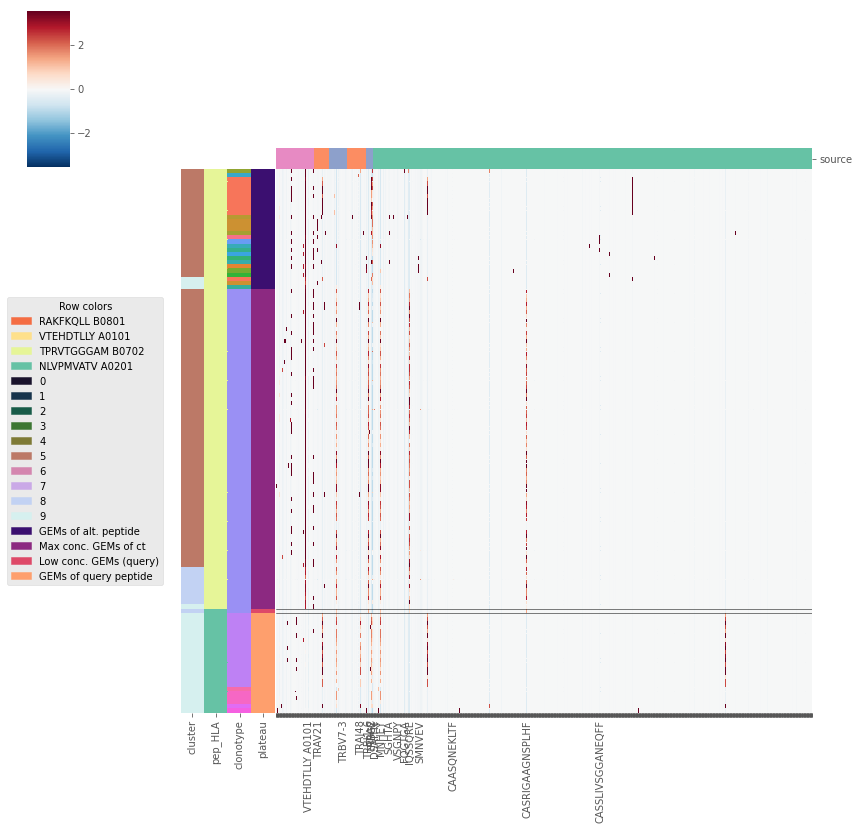

6.0
EERQAYLTNQY A0101


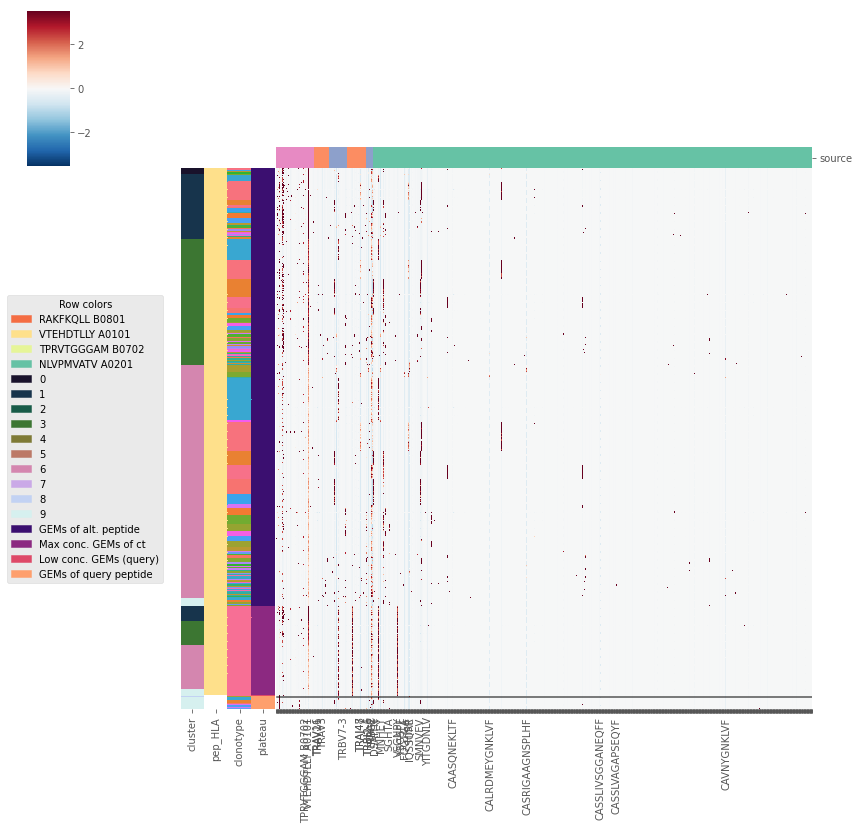

2.0
VTEHDTLLY A0101


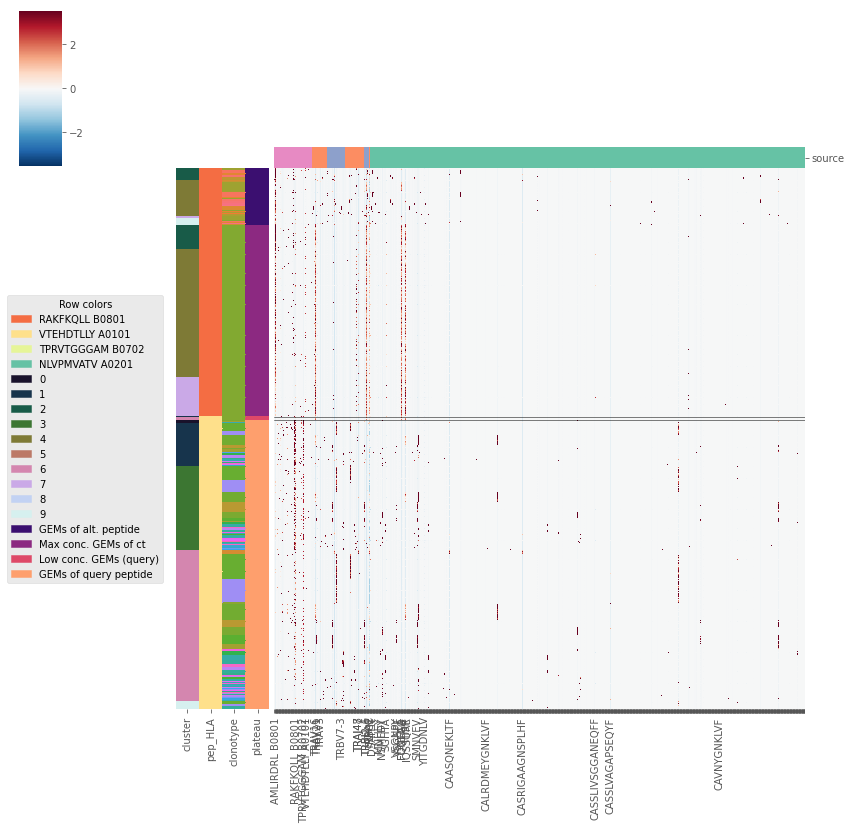

TPRVTGGGAM B0702


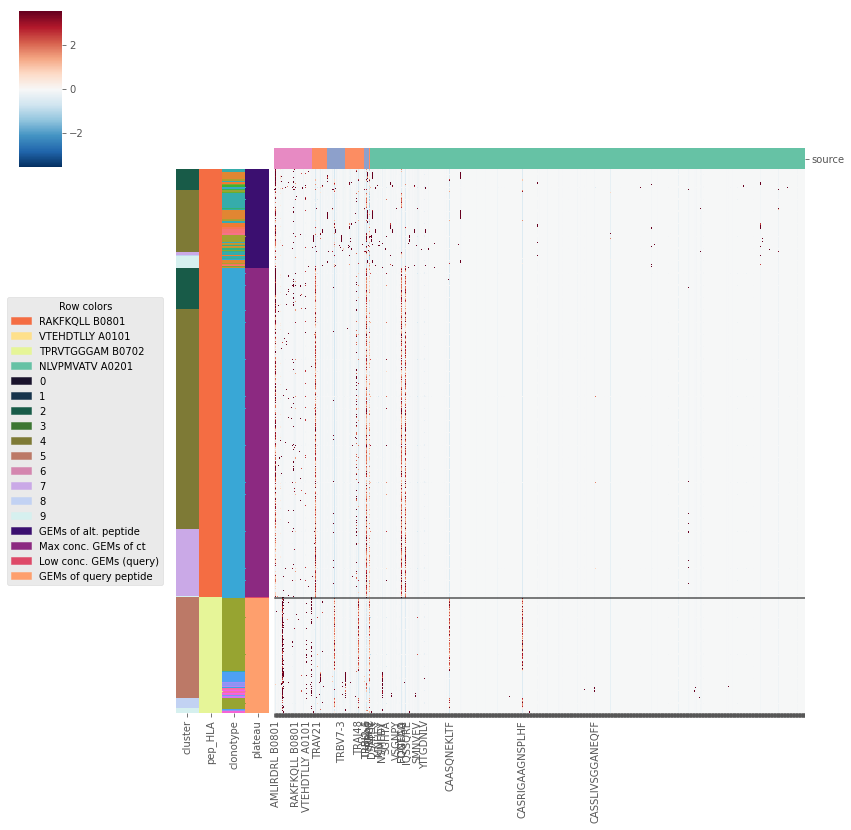

DEYVHNTTA B0801


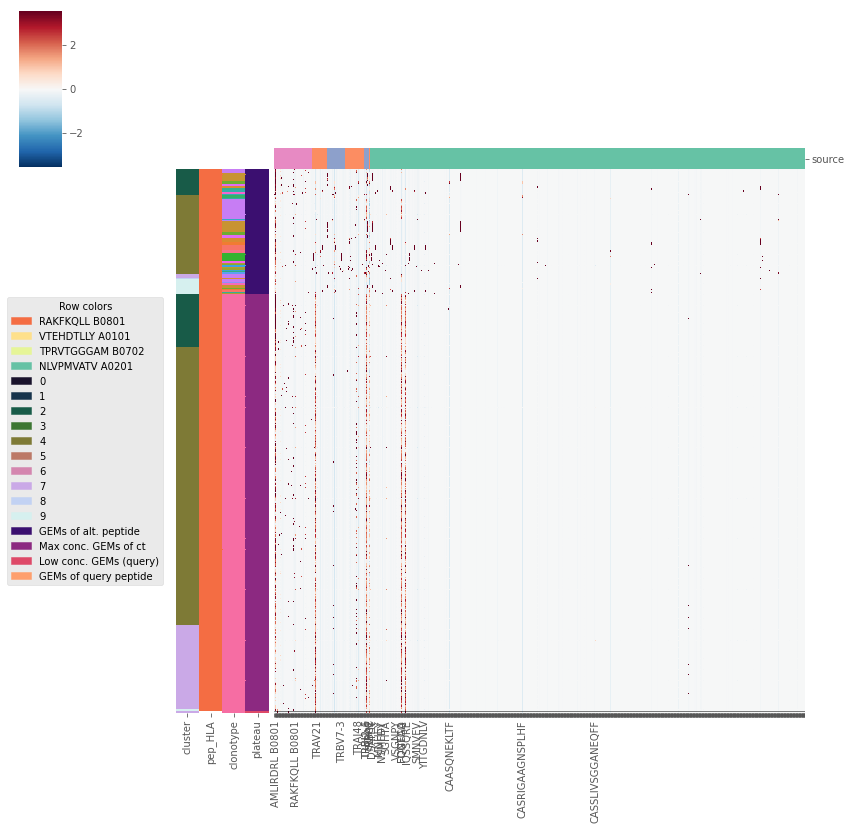

35.0
FSAGAFILYK A0101


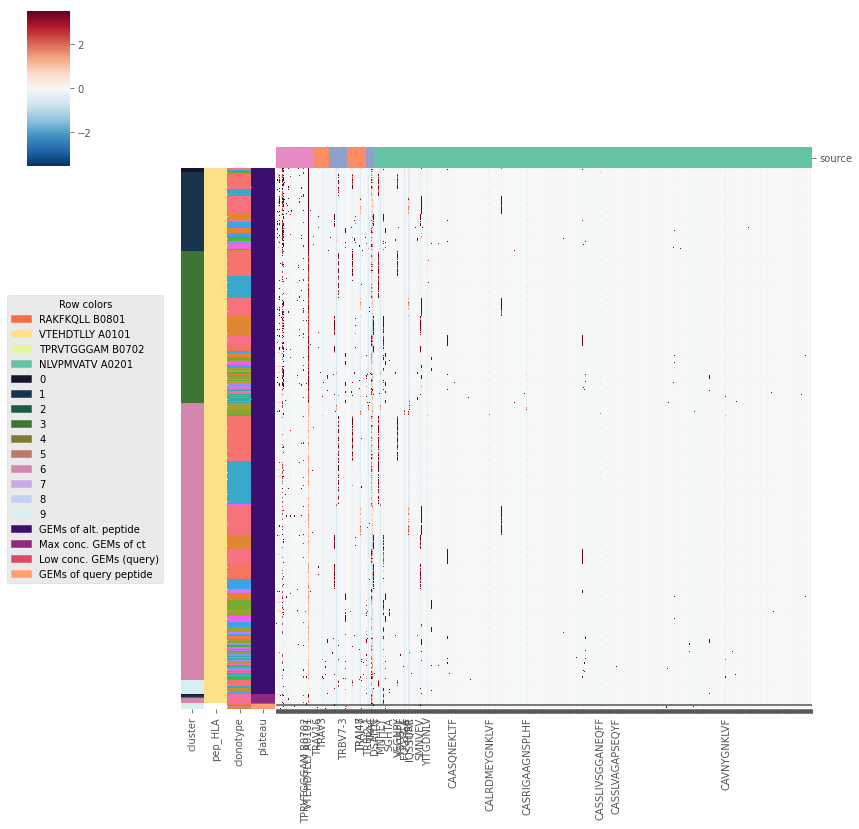

14.0
EERQAYLTNQY A0101


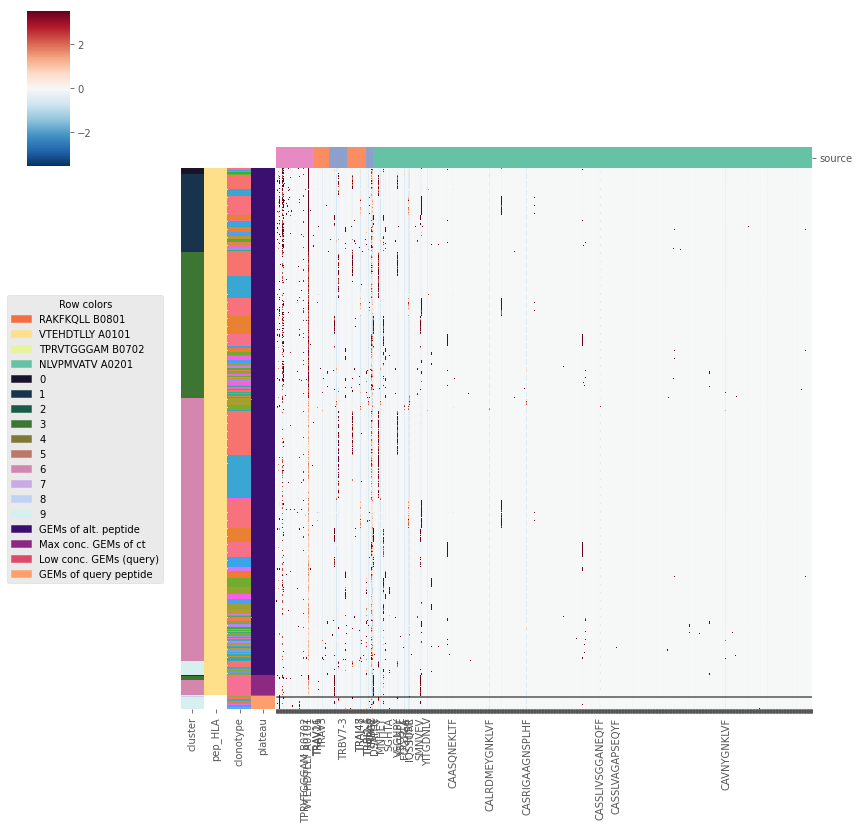

11.0
EERQAYLTNQY A0101


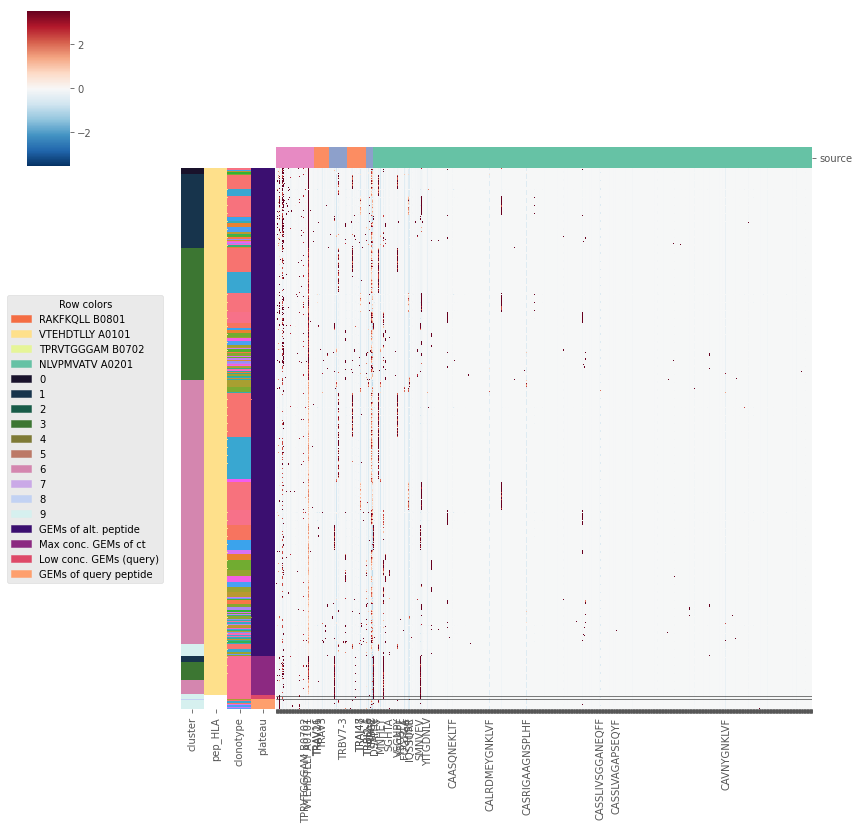

FSAGAFILYK A0101


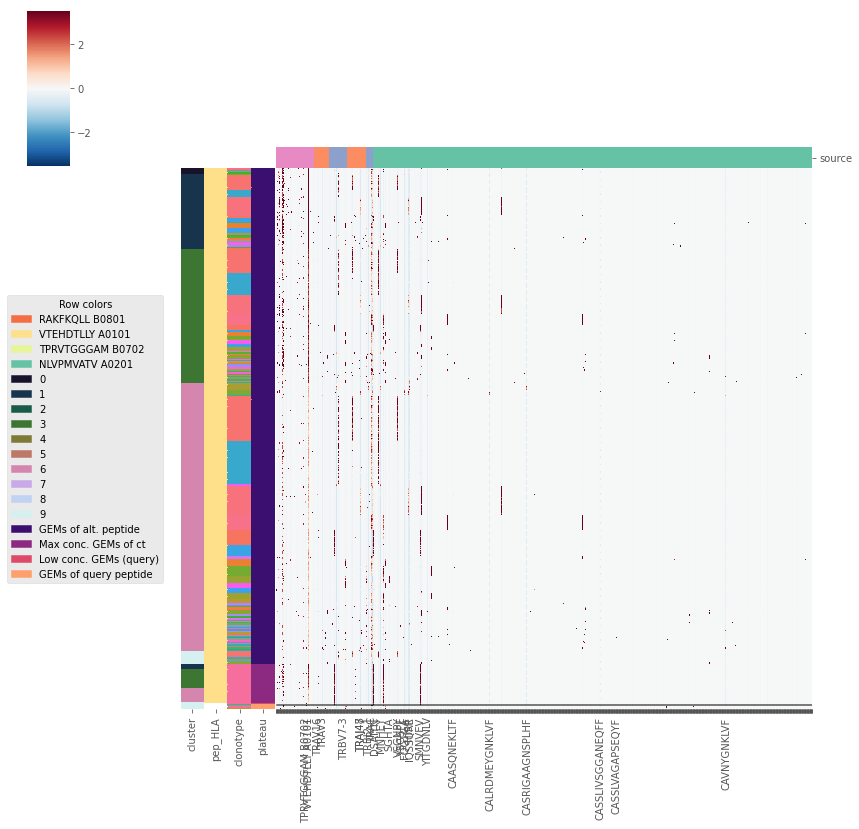

RAKFKQLL B0801


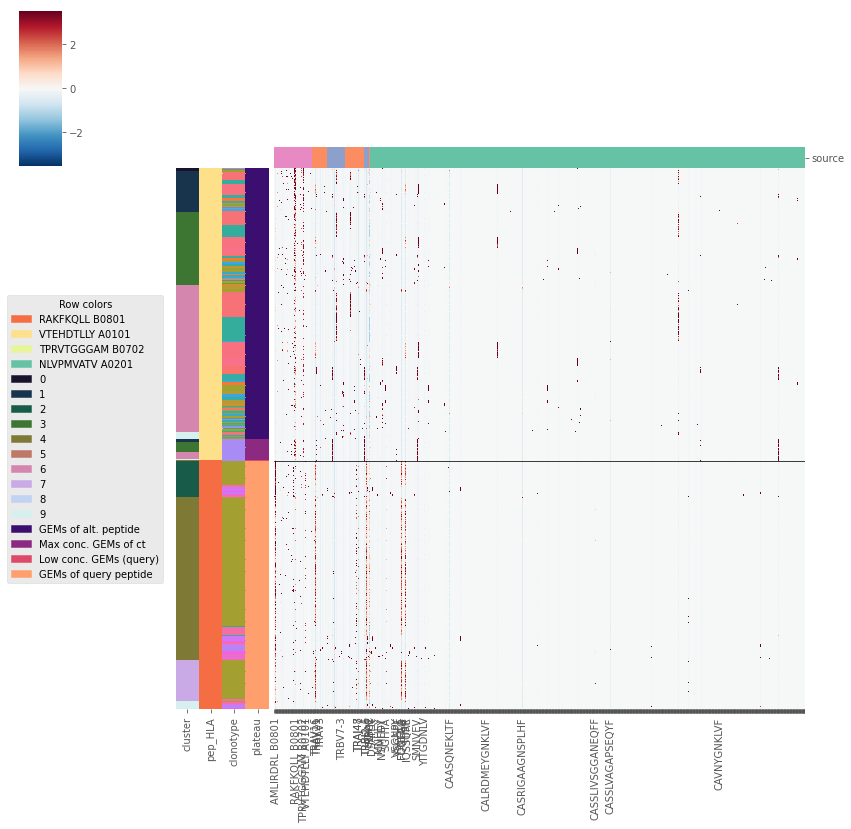

3.0
ALPGVPPV A0201


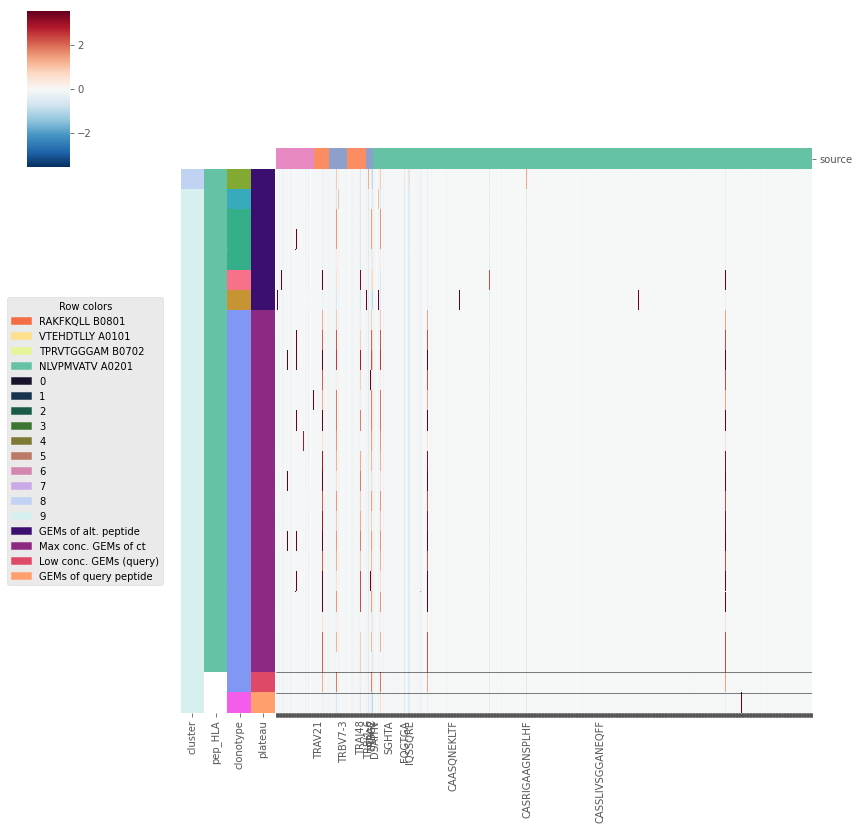

RAKFKQLL B0801


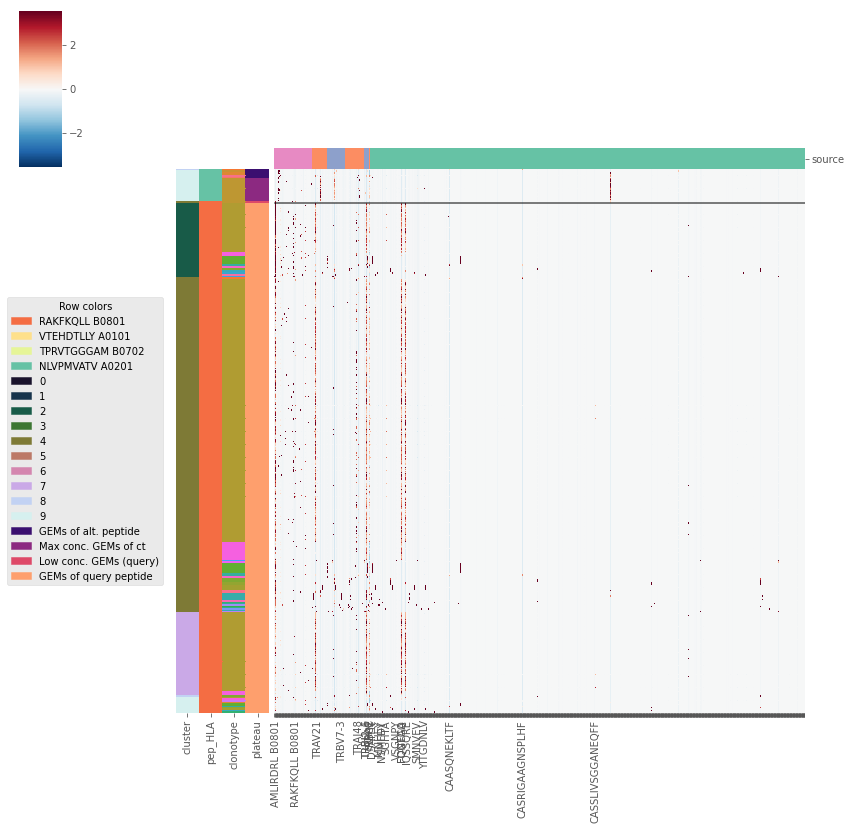

VTEHDTLLY A0101


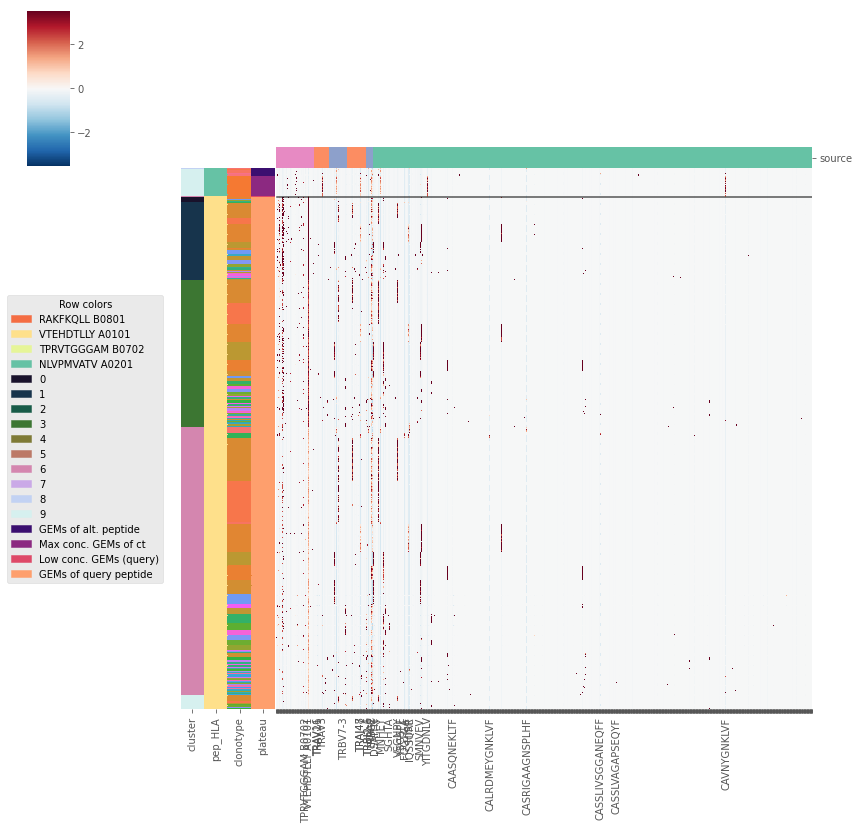

16.0
RAKFKQLL B0801


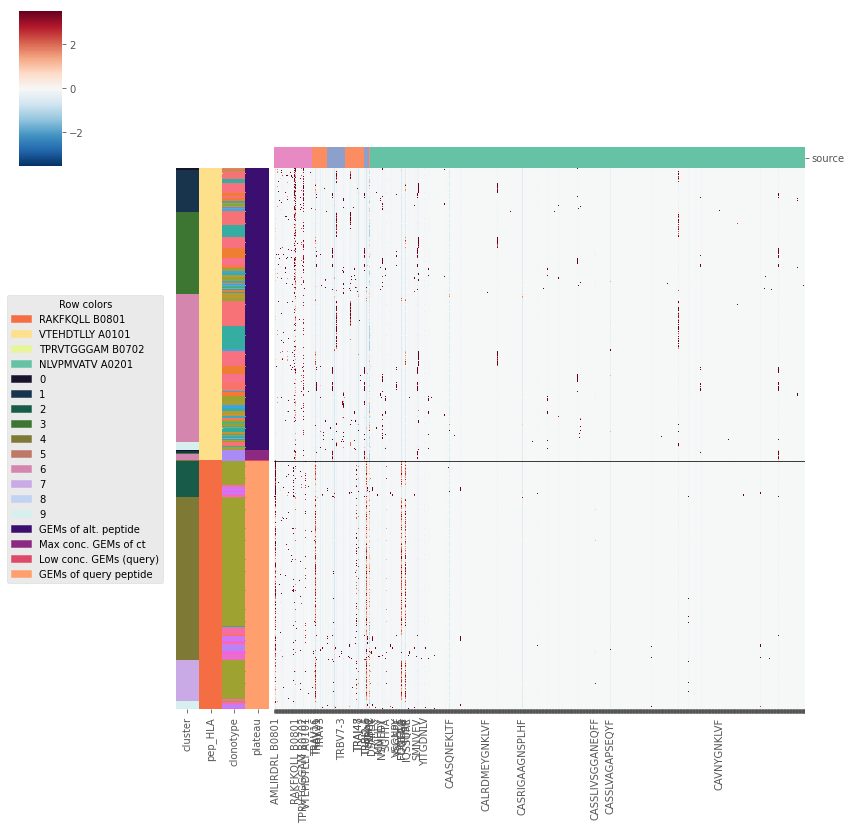

FSAGAFILYK A0101


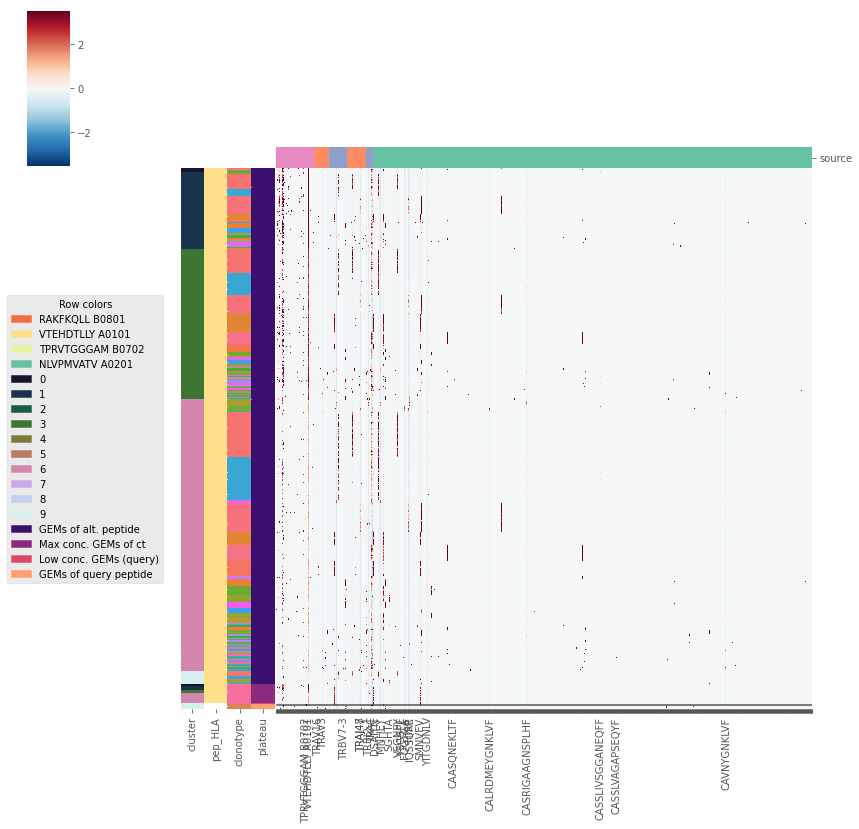

47.0
EERQAYLTNQY A0101


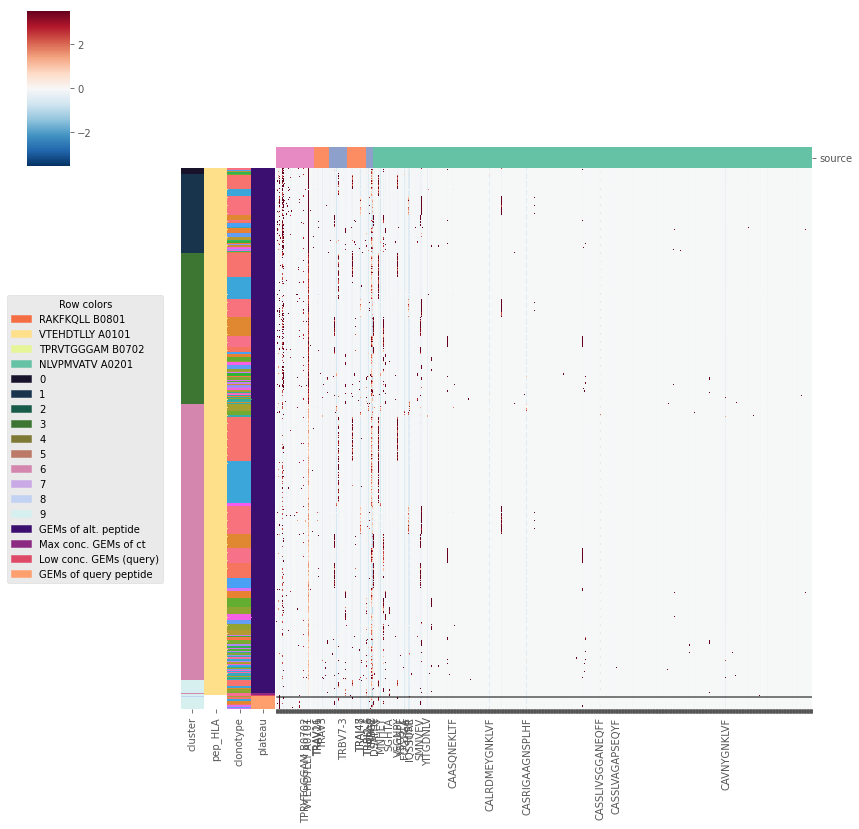

9.0
VTEHDTLLY A0101


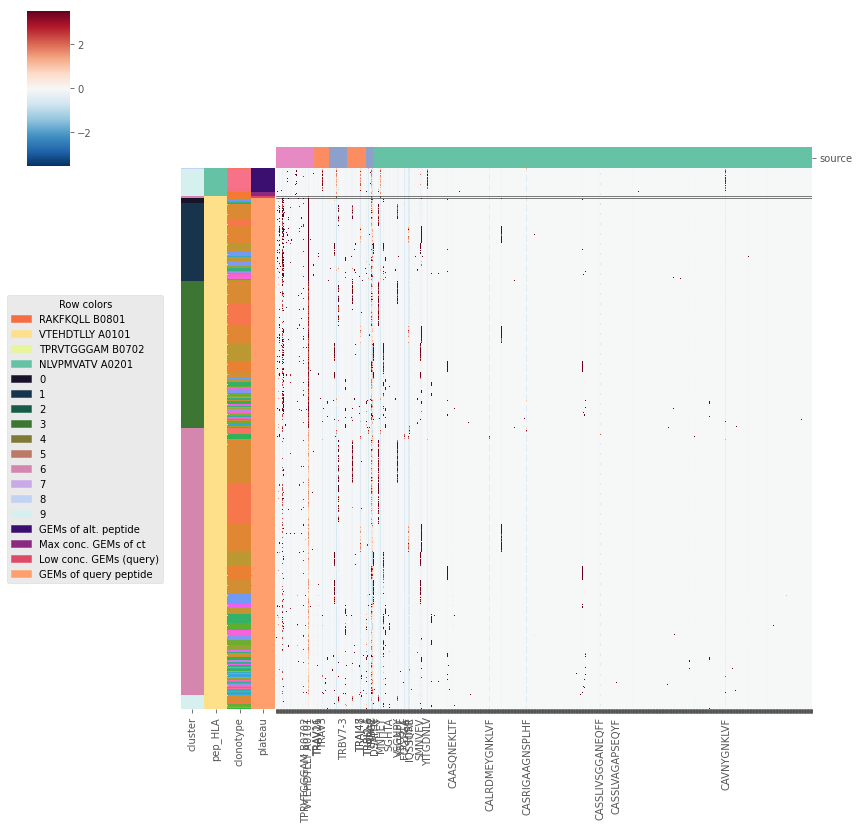

RAKFKQLL B0801


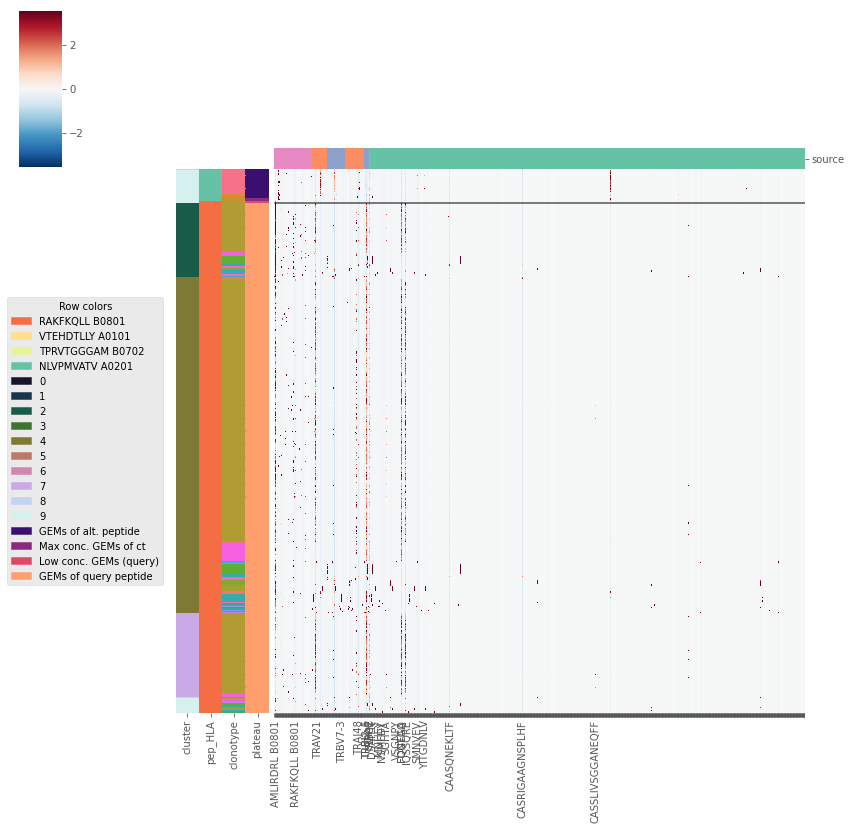

4.0
WPRAPRGQI B0801


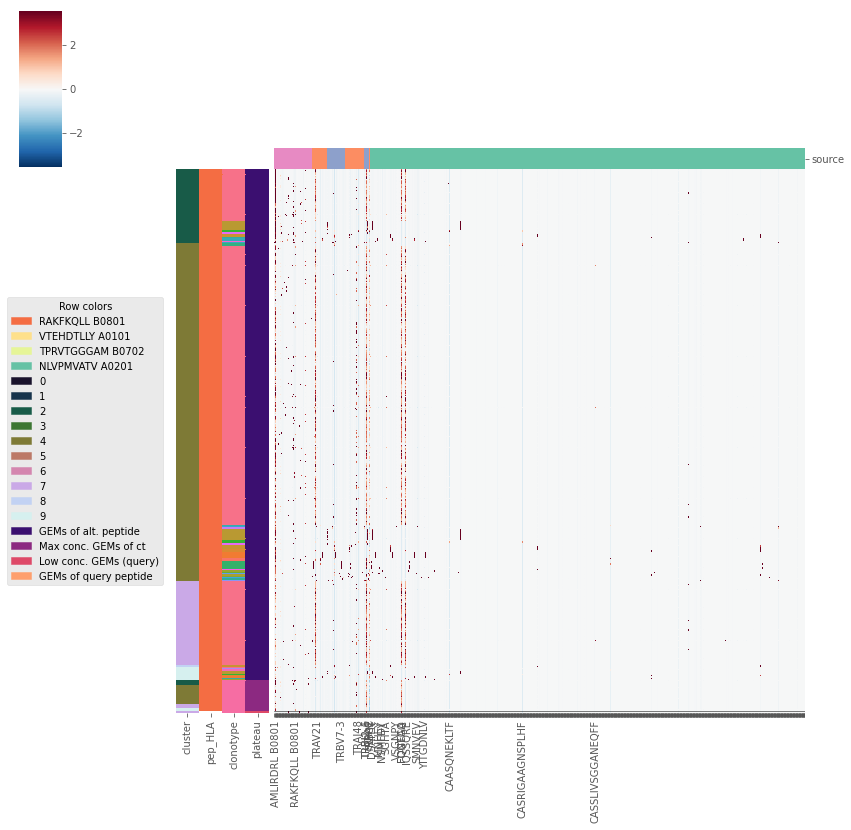

TPRVTGGGAM B0702


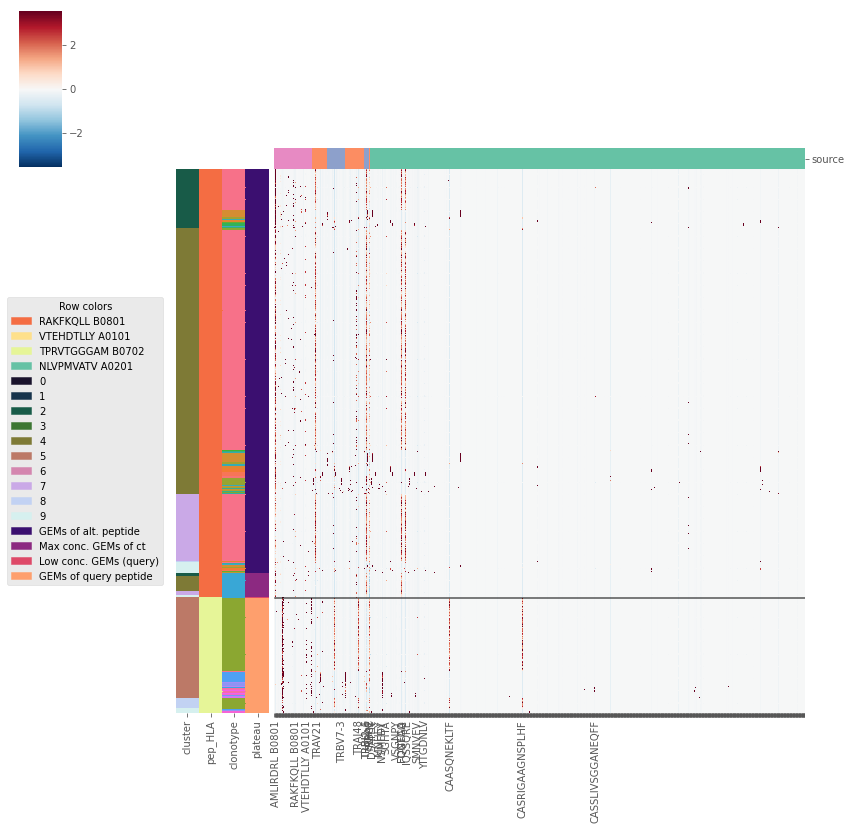

19.0
EERQAYLTNQY A0101


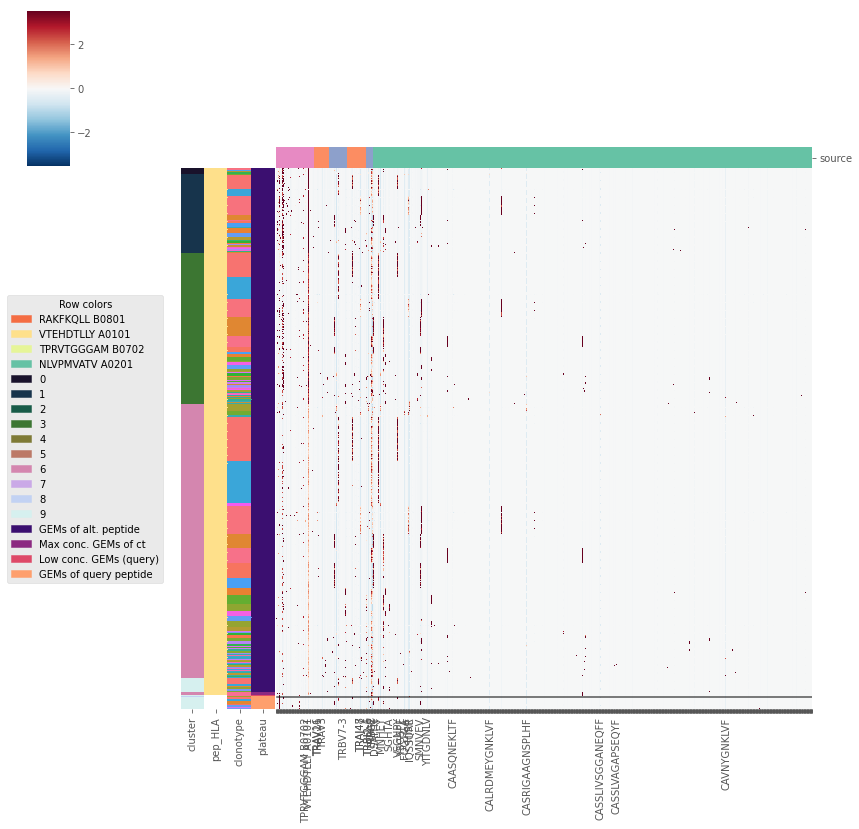

36.0
EERQAYLTNQY A0101


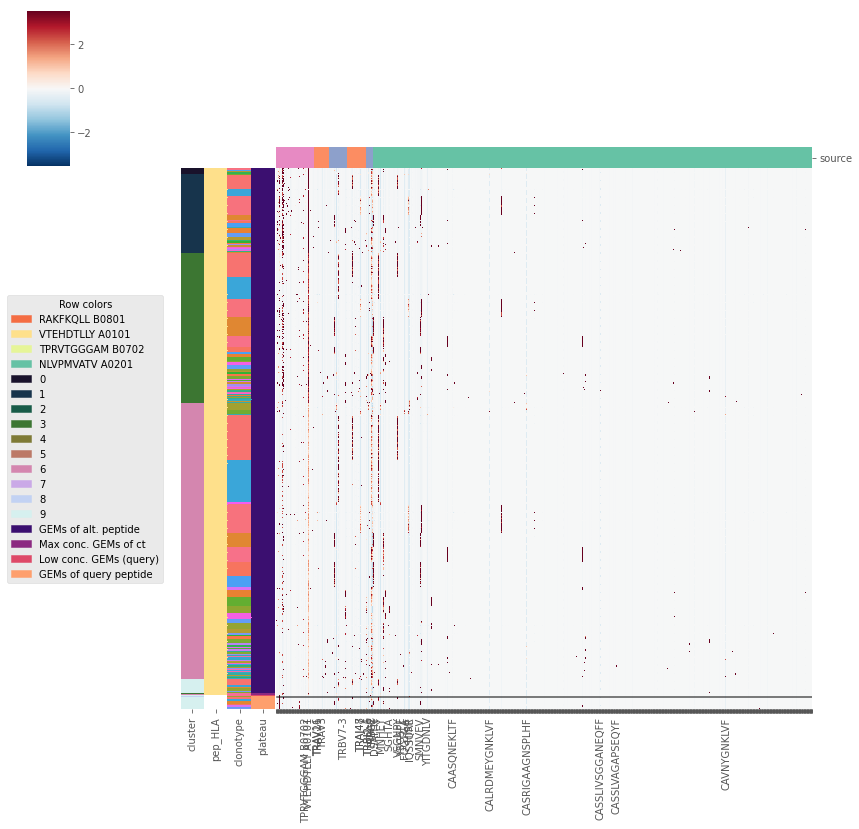

7.0
EERQAYLTNQY A0101


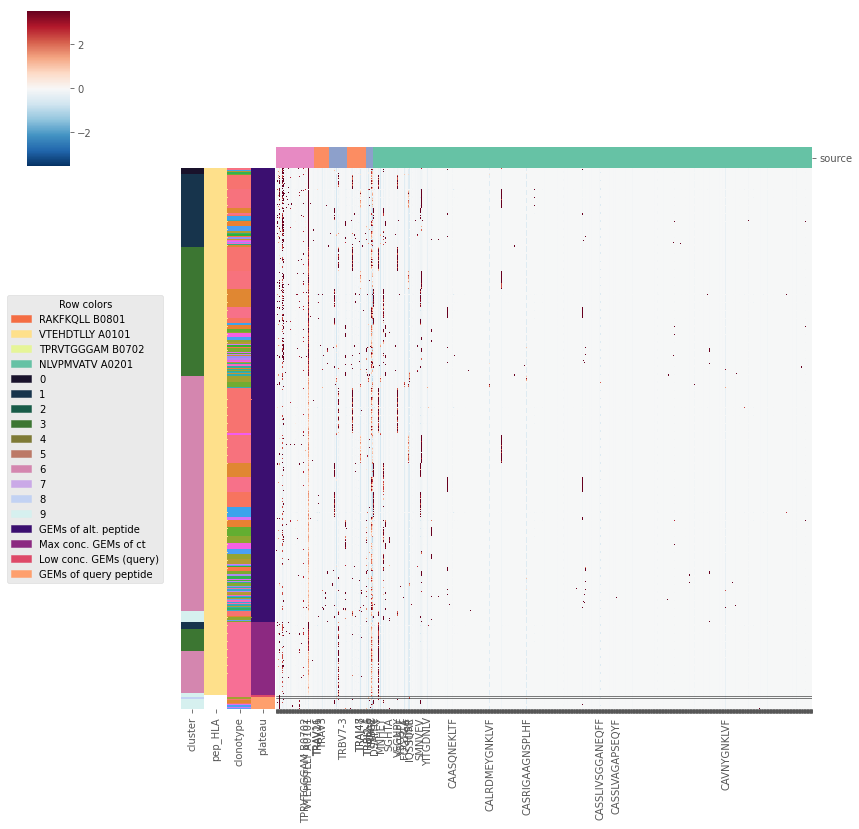

NLVPMVATV A0201


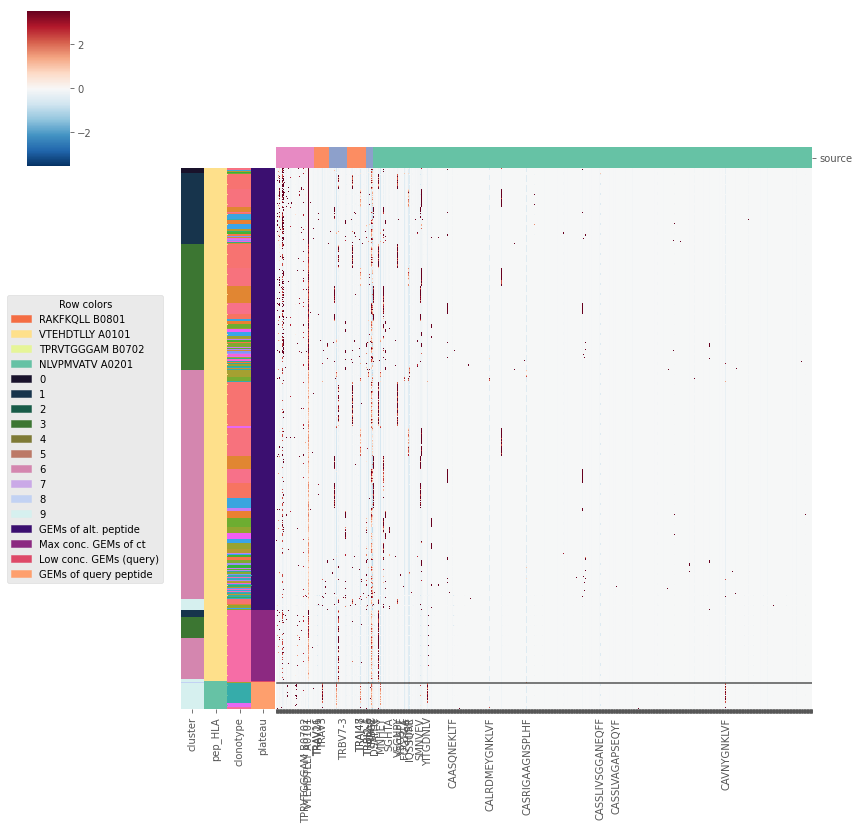

32.0
EERQAYLTNQY A0101


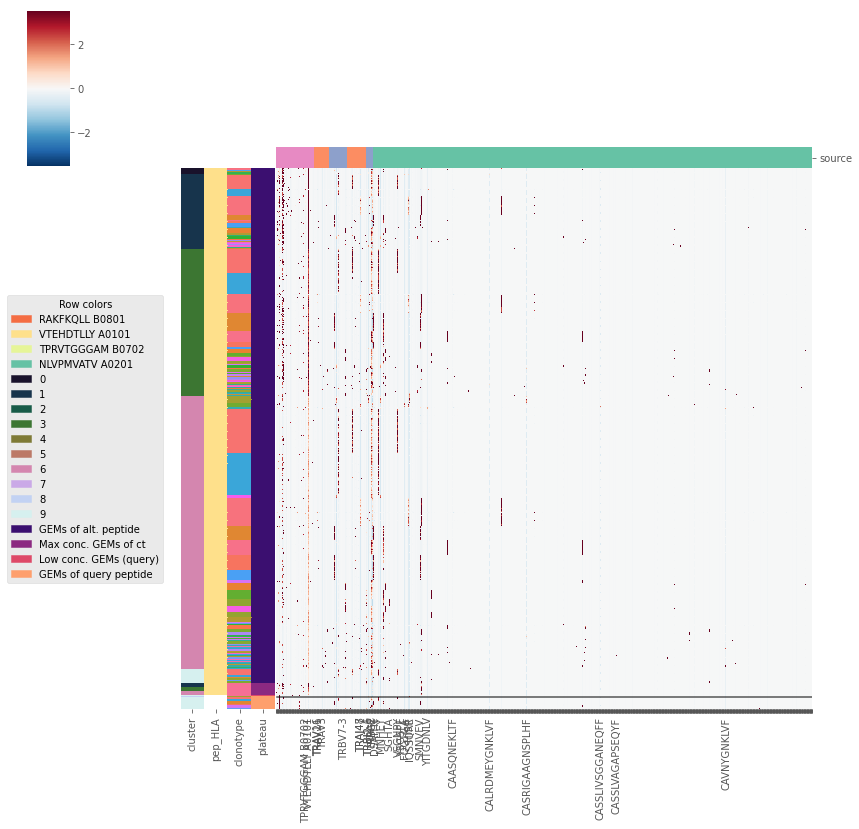

In [89]:

for ct in relevant_clonotypes:
    print(ct)
    
    mx_conc = total[total.ct == ct].binding_concordance.max()
    # OBS: When two peptides each have conc = 0.5 just randomly chose one as max and the other as alternative.
    mx_conc_peptide = total[(total.ct == ct) & (total.binding_concordance == mx_conc)].peptide_HLA.unique()[0]
    mx_conc_ct_gems = total[(total.ct == ct) & (total.peptide_HLA == mx_conc_peptide)].gem
    mx_conc_pt_gems = total[(total.ct != ct) & (total.peptide_HLA == mx_conc_peptide)].gem
    #mx_conc_pt_gems = mx_conc_pt_gems.sample(frac=0.2)
    
    for alt_peptide in total[(total.ct == ct) & (total.peptide_HLA != mx_conc_peptide)].peptide_HLA.unique():
        print(alt_peptide)
        alt_pep_gems = total[(total.ct != ct) & (total.peptide_HLA == alt_peptide)].gem
        query_gems = total[(total.ct == ct) & (total.peptide_HLA == alt_peptide)].gem
        
        print('Cluster:', meta.loc[query_gems, 'KMeans'].unique())
        
        labels = ([1] * len(mx_conc_pt_gems) +
                  [2] * len(mx_conc_ct_gems) +
                  [3] * len(query_gems) +
                  [4] * len(alt_pep_gems))

        gems = pd.concat([mx_conc_pt_gems, mx_conc_ct_gems, query_gems, alt_pep_gems])
        data_tmp = data.loc[gems, :]
        meta_tmp = meta.loc[gems, :]
        meta_tmp['ct_rescue'] = labels
        
        clst_rel = meta_tmp.KMeans.unique()
        xtck_rel = np.unique(topg_df[clst_rel].to_numpy().flatten())
        xtck_lab = np.where(data.columns.isin(xtck_rel), data.columns, None)

        colors_ct = sns.color_palette('husl', len(meta_tmp.ct_cred.unique()))
        col2ct = dict(zip(meta_tmp.ct_cred.unique(), colors_ct))

        row_colors = pd.DataFrame({'cluster': meta_tmp.KMeans.map(col2cluster),
                                   'pep_HLA': meta_tmp.peptide_HLA_cred.map(col2pep_HLA),
                                   'clonotype': meta_tmp.ct.map(col2ct),
                                   'plateau': meta_tmp.ct_rescue.map(col2stair)})

        sorted_index = meta_tmp.sort_values(by=['ct_rescue', 'KMeans', 'peptide_HLA_cred', 'ct_cred']).index

        lim = np.max(np.max(np.abs(data_tmp)))/20

        cg = sns.clustermap(data_tmp.reindex(sorted_index),
                            row_colors=row_colors.reindex(sorted_index),
                            col_colors=column_color,
                            cmap='RdBu_r', 
                            vmin=-lim, vmax=lim, yticklabels=[], xticklabels=xtck_lab,
                            col_cluster=False, row_cluster=False)
        
        l2=cg.ax_heatmap.legend(loc='center right',bbox_to_anchor=(-0.2,0.5),handles=legend_TN,frameon=True)
        l2.set_title(title='Row colors',prop={'size':10})

        cg.ax_heatmap.figure.set_size_inches(12,12)
        ax = cg.ax_heatmap  # this is the important part
        ax.axhline(meta_tmp.index.to_list().index(query_gems.to_list()[0]), lw=0.5, c='black')
        ax.axhline(meta_tmp.index.to_list().index(query_gems.to_list()[-1])+1, lw=0.5, c='black')
        
        #plt.title('Comparison of specificity %i: %s with specificities towards %s' %(ct, alt_peptide, mx_conc_peptide))

        plt.savefig('heatmap.%i.%s.pdf' %(ct, alt_peptide.split(' ')[0]), bbox_inches='tight')
        plt.show()


In [86]:
total[(total.ct == ct)]

,gem,clonotype,num_clonotype,ct,genes_TRA,genes_TRB,genes_lst_TRA,genes_lst_TRB,length_TRA,cdr3_TRA,...,likely_HLA_mhc,peptide,peptide_lst,peptide_HLA,peptide_HLA_lst,epitope,epitope_lst,gems_per_specificity,gems_per_clonotype,binding_concordance
302,AGCCTAATCTTCAACT-1,clonotype81,81.0,157.0,TRAV41;TRAJ49;TRAC,TRBV9;;TRBJ2-7;TRBC2,['TRAV41;TRAJ49;TRAC'],['TRBV9;;TRBJ2-7;TRBC2'],587.0,CAVRFMLGNQFYF,...,NaN,VTEHDTLLY,['FSAGAFILYN' 'TNQYMQRMASV' 'ATTADVDAGSL' 'VTE...,VTEHDTLLY A0101,['FSAGAFILYN A0101' 'TNQYMQRMASV A2401' 'ATTAD...,V15_A1 CMV pp50 VTE,['45_1_5' '45_1_61' '45_1_1' 'V15_A1 CMV pp5...,1,2,0.5
513,CACACCTTCAACACGT-1,clonotype81,81.0,157.0,TRAV41;TRAJ49;TRAC,TRBV9;;TRBJ2-7;TRBC2,['TRAV41;TRAJ49;TRAC'],['TRBV9;;TRBJ2-7;TRBC2'],615.0,CAVRFMLGNQFYF,...,NaN,FSAGAFILYK,['FLDTNQVVRI' 'EERQAYLTNQY' 'VTEHDTLLY' 'RAKFK...,FSAGAFILYK A0101,['FLDTNQVVRI A0201' 'EERQAYLTNQY A0101' 'VTEHD...,45_1_4,['06_1_4' '45_1_3' 'V15_A1 CMV pp50 VTE' 'V...,1,2,0.5


In [87]:
total[(total.ct == ct) & (total.binding_concordance < mx_conc)]

,gem,clonotype,num_clonotype,ct,genes_TRA,genes_TRB,genes_lst_TRA,genes_lst_TRB,length_TRA,cdr3_TRA,...,likely_HLA_mhc,peptide,peptide_lst,peptide_HLA,peptide_HLA_lst,epitope,epitope_lst,gems_per_specificity,gems_per_clonotype,binding_concordance


In [ ]:
data_tmp.loc[meta_tmp[meta_tmp.KMeans == 9].index, :].drop_values()

In [23]:
len(labels)

463

In [26]:
pd.concat([mx_conc_pt_gems, mx_conc_ct_gems, query_gems, alt_pep_gems]).drop_duplicates()

14      AAAGCAAAGCTCTCGG-1
20      AAAGTAGTCGTAGGAG-1
21      AAATGCCGTACAAGTA-1
25      AAATGCCTCTTGTATC-1
26      AACACGTCAAGTTGTC-1
               ...        
2008    TTCTACAGTCTCCATC-1
2109    AGAGCGACAAGTTGTC-1
2307    GGATTACAGTAGCGGT-1
2309    GGCCGATCACGGTAAG-1
2396    TGCTGCTCATACTACG-1
Name: gem, Length: 488, dtype: object

In [27]:
len(mx_conc_pt_gems)

461

In [28]:
len(mx_conc_ct_gems)

2

In [29]:
len(query_gems)

1

In [30]:
len(alt_pep_gems)

24